# **Análisis Predictivo y Descriptivo del Impacto de Factores Demográficos y Económicos en los Niveles de Ingresos en Canadá**

# Paso 1: definición del problema.
## Este proyecto tiene el potencial de ofrecer insights valiosos para diseñar políticas públicas, programas sociales y estrategias individuales para mejorar la movilidad económica
## Objetivos
- Objetivo General:
  Analizar y predecir los factores clave que influyen en los niveles de ingresos y el bienestar 
financiero en Canadá.
- Objetivos Específicos:
  1. Identificar las variables más relevantes que afectan los ingresos mediante técnicas de selección 
de características.
  2. Predecir los ingresos individuales utilizando modelos de Machine Learning supervisado.
  3. Visualizar las desigualdades regionales y por grupo demográfico en el bienestar financiero.

## Introducción al Análisis Exploratorio de Datos (EDA)

Este análisis se realiza para explorar, entender y visualizar el conjunto de datos proporcionado. El objetivo es identificar patrones, tendencias, anomalías y relaciones entre las variables.

El conjunto de datos contiene información sobre varios aspectos de las personas, como su brecha de edad, ingresos después de impuestos, estado laboral, nivel educativo y ciudad de residencia.

Antes de proceder, presentamos la leyenda con el significado de las abreviaturas de las columnas para mayor claridad:
### **Leyenda de las columnas**
**CIS Dataset Dictionary**

- PERSONID -> Unique identifier for each individual in the dataset.
- Weight -> Survey weight assigned to each individual to adjust for sampling representation.
- Province -> The province in which the individual resides.
- MBMREGP -> Market Basket Measure Region Code, used for assessing poverty levels.
- Age_gap -> Age category or age gap classification of the individual.
- Gender -> Gender of the individual (e.g., Male, Female, Other).
- Marital_status -> Gender of the individual (e.g., Male, Female, Other).
- Highschool -> Indicates whether the individual has completed high school (Yes/No).
- Highest_edu -> The highest level of education attained by the individual.
- Work_ref -> Employment status reference (e.g., Employed, Unemployed, Retired)
- Work_yearly -> Total number of years the individual has been employed.
- Emp_week_ref -> Number of weeks worked in a reference period.
- Total_hour_ref -> Total hours worked in the reference period.
- paid_emp__ref -> Number of weeks worked as a paid employee.
- self_emp_ref -> Number of weeks worked as a self-employed individual.
- Immigrant -> Indicates whether the individual is an immigrant (Yes/No).
- Year_immigrant -> The year the individual immigrated to the country.
- income_after_tax -> The individual's total income after taxes.
- Cap_gain -> Capital gains earned by the individual.
- Childcare_expe -> Total expenses incurred for childcare.
- Child_benefit -> Government benefits received for childcare.
- CPP_QPP -> Canada Pension Plan (CPP) or Quebec Pension Plan (QPP) contributions.
- Earning -> Total earnings of the individual before deductions.
- Guaranteed_income -> Guaranteed income supplement received.
- Investment -> Total investment income of the individual.
- Old_age_pension -> Old Age Security (OAS) pension received.
- Private_pension -> Private pension plan contributions.
- Self_emp_income -> Income earned through self-employment.
- Pension -> Total pension income received from various sources.
- Total_income -> Sum of all income sources before deductions.
- Emp_insurance -> Employment insurance benefits received.
- Salary_wages -> Salary and wages earned from employment.
- compensation -> Any compensation received due to work-related matters.
- Family_mem -> Number of family members in the household.
- CFCOMP -> Family composition classification.
- CONDMP -> Type of dwelling or housing condition.
- RENTM -> Monthly rent paid for housing.



Importación de las librerías necesarias

In [152]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Módulo para interactuar con el sistema operativo de forma sencilla:
import os

#
from sklearn.model_selection import train_test_split

#
from sklearn.linear_model import LinearRegression

#
from sklearn.metrics import r2_score, mean_absolute_error

#
import kagglehub

#
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Paso 2. Lectura de datos.


In [153]:
# Importamos el dataset público.

path = kagglehub.dataset_download("aradhanahirapara/income-survey-finance-analysis")

print("Path to dataset files:", path)

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/aradhanahirapara/income-survey-finance-analysis/versions/1


In [154]:
# Lista los archivos en la ruta

files = os.listdir(path)
print("Archivos en el dataset:", files)

Archivos en el dataset: ['Income Survey Dataset.csv', 'Income_Dataset_Dictionary.docx']


In [155]:
# Cargar el archivo CSV en un DataFrame

dataset_path = os.path.join(path, "Income Survey Dataset.csv")
data = pd.read_csv(dataset_path)
data.head()

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


# Paso 3. Exploración y limpieza de datos.
## Paso 3.1 Comprensión de las características.

In [156]:
# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data.shape[0]} voluntarios, con un total de {data.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 72643 voluntarios, con un total de 38 datos característicos de cada uno de ellos.


## Paso 3.2 Identificación de valores duplicados y nulos.

In [157]:
# Información sobre las columnas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Year_immigrant     726

- En este punto conocemos que todas las variables son numéricas y por exigencias del proyecto transformaremos una de estas variables ("Province") a categórica.
- También conocemos que no existen valores nulos

In [158]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data.duplicated().sum()} valores duplicados.")

 Hay un total de 0 valores duplicados.


## Paso 4. Análisis de correlación de variables

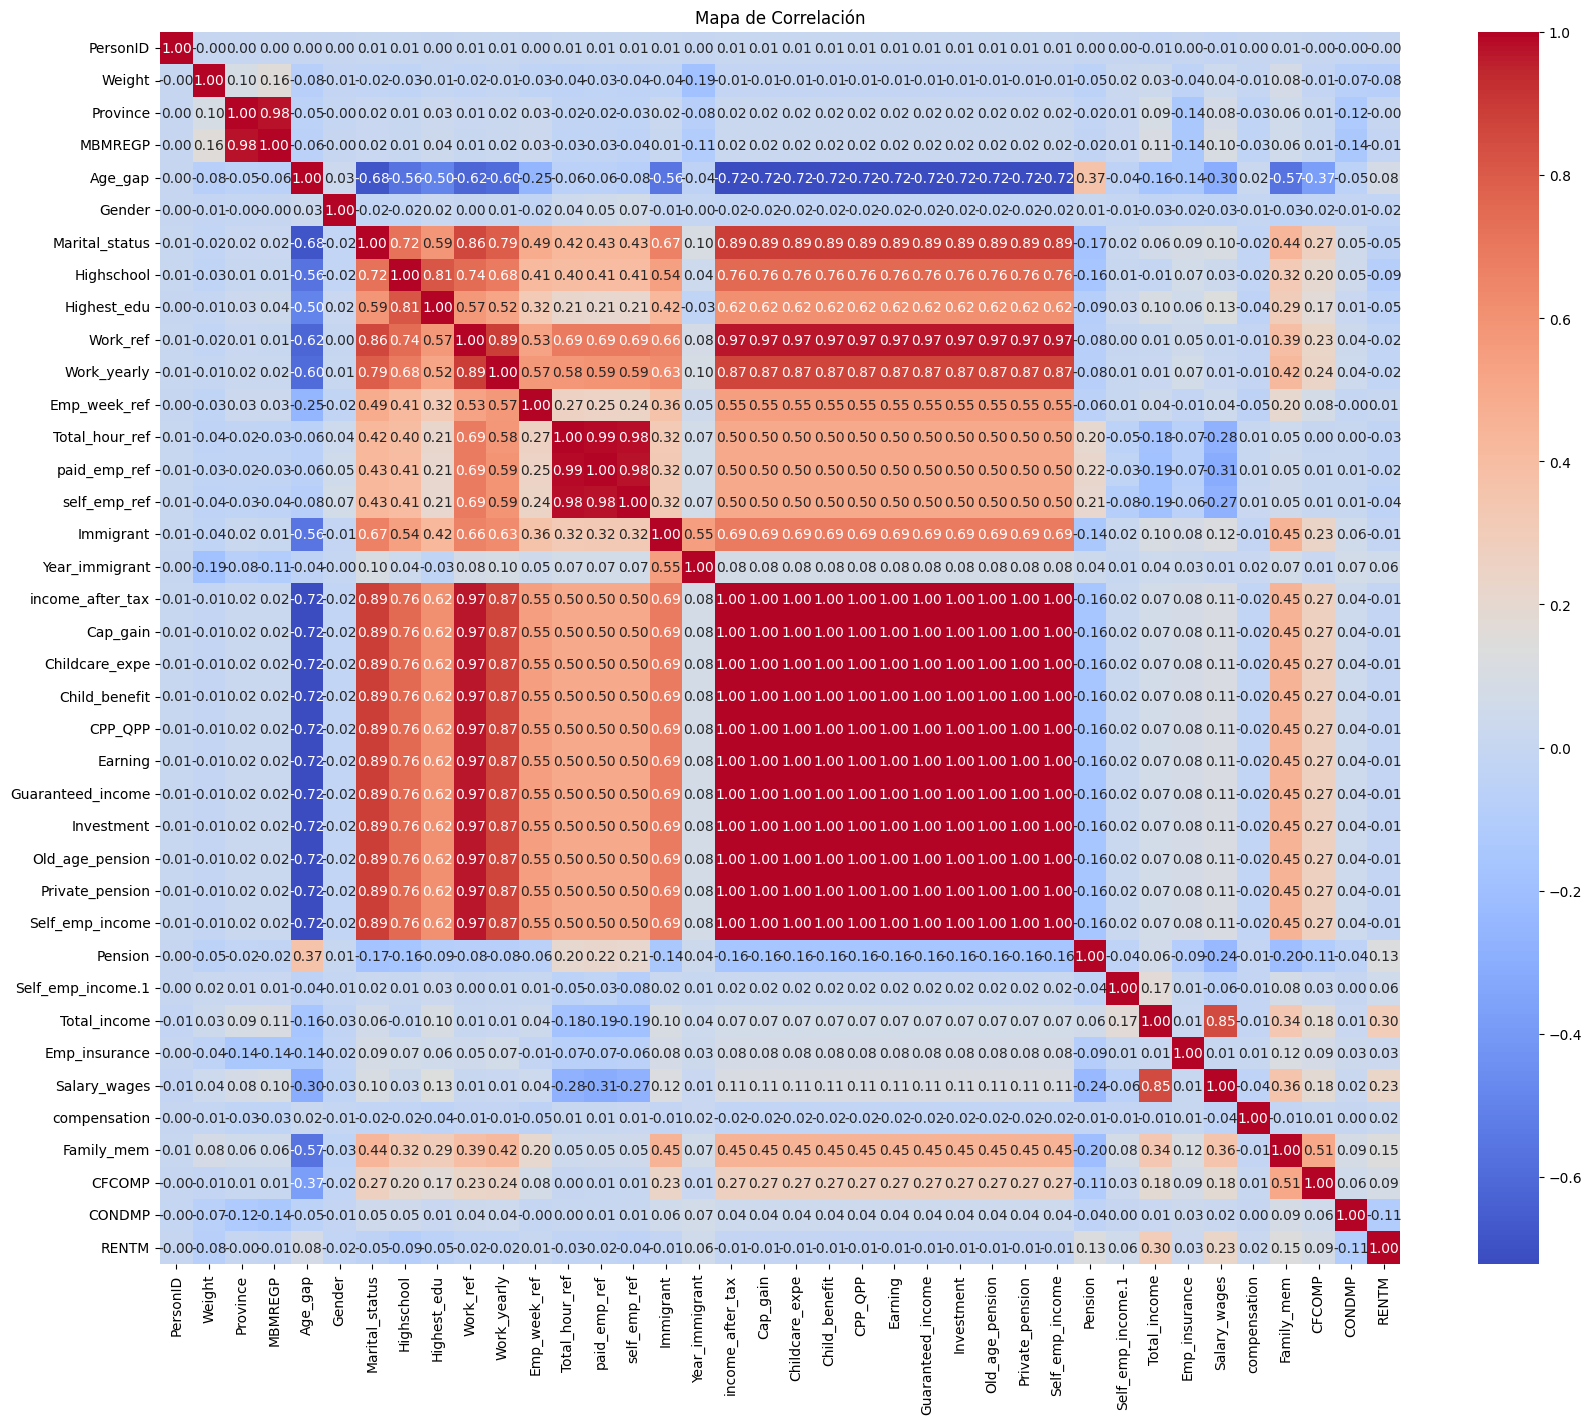

In [159]:
# Nuestra variable target sería "income_after_tax"

# Calculamos las correlaciones
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")#solo dos valores decimales
plt.title("Mapa de Correlación")
plt.show()

## Paso 5. Eliminar variables altamente correlacionadas

Si dos variables tienen una correlación muy alta (por ejemplo, mayor a 0.95), pueden aportar la misma información. Por tanto eliminamos una de ellas.

In [160]:
# Seleccionar un umbral de correlación alta
threshold = 0.95

# Encontrar pares de variables con correlación alta
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
             # Asegurar que no se elimine "income_after_tax"
            if colname != "income_after_tax":
                correlated_features.add(colname)
            

# Eliminar variables redundantes
data.drop(columns=correlated_features, inplace=True)

# Mostrar las variables eliminadas
print("Variables eliminadas:", correlated_features)
# Mostrar las columnas restantes
print("Variables restantes:", data.columns)

Variables eliminadas: {'Old_age_pension', 'Investment', 'Guaranteed_income', 'self_emp_ref', 'Childcare_expe', 'CPP_QPP', 'Cap_gain', 'Earning', 'MBMREGP', 'Self_emp_income', 'paid_emp_ref', 'Child_benefit', 'Private_pension'}
Variables restantes: Index(['PersonID', 'Weight', 'Province', 'Age_gap', 'Gender', 'Marital_status',
       'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref',
       'Total_hour_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Pension', 'Self_emp_income.1', 'Total_income', 'Emp_insurance',
       'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP',
       'RENTM'],
      dtype='object')


## Paso 5.1. Cálculo del Factor de Inflación de Varianza (VIF) para Detectar Multicolinealidad

In [161]:
# Load your dataset (assuming it's in a DataFrame called df)
# df = pd.read_csv("your_file.csv")  # Uncomment if loading from file

# Drop non-numeric columns before VIF calculation
numeric_df = data.select_dtypes(include=[np.number]).drop(columns=['PersonID', 'Weight'])  # IDs & survey weight

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature         VIF
6            Work_ref  862.471728
9      Total_hour_ref   72.700026
11     Year_immigrant   38.442966
15       Total_income   19.169241
1             Age_gap   18.991235
5         Highest_edu   14.592211
17       Salary_wages   14.199241
7         Work_yearly   12.832631
10          Immigrant   11.671340
2              Gender   10.510080
19         Family_mem   10.342212
4          Highschool    9.821627
20             CFCOMP    8.352681
3      Marital_status    6.937963
0            Province    6.741359
8        Emp_week_ref    6.457369
13            Pension    2.096881
14  Self_emp_income.1    1.464358
16      Emp_insurance    1.211663
18       compensation    1.032842
22              RENTM   -0.057135
21             CONDMP   -0.065290
12   income_after_tax   -2.120780


In [162]:
columns_to_drop = ['PersonID', 'Weight', 'Pension', 'Total_income', 'Work_yearly', 'Emp_week_ref', 
                   'Total_hour_ref']

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,Province,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,Year_immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,59,15,2,3,1,3,2,2,6,20275,0,0,0,0,1,1,99999996,99999996
1,35,9,1,1,1,2,1,2,6,61680,0,0,106000,0,4,4,99999996,99999996
2,35,9,2,1,1,3,1,2,6,26875,0,0,106000,0,4,4,99999996,99999996
3,35,4,1,4,2,1,1,2,6,14000,0,0,106000,0,4,4,99999996,99999996
4,35,3,1,96,6,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


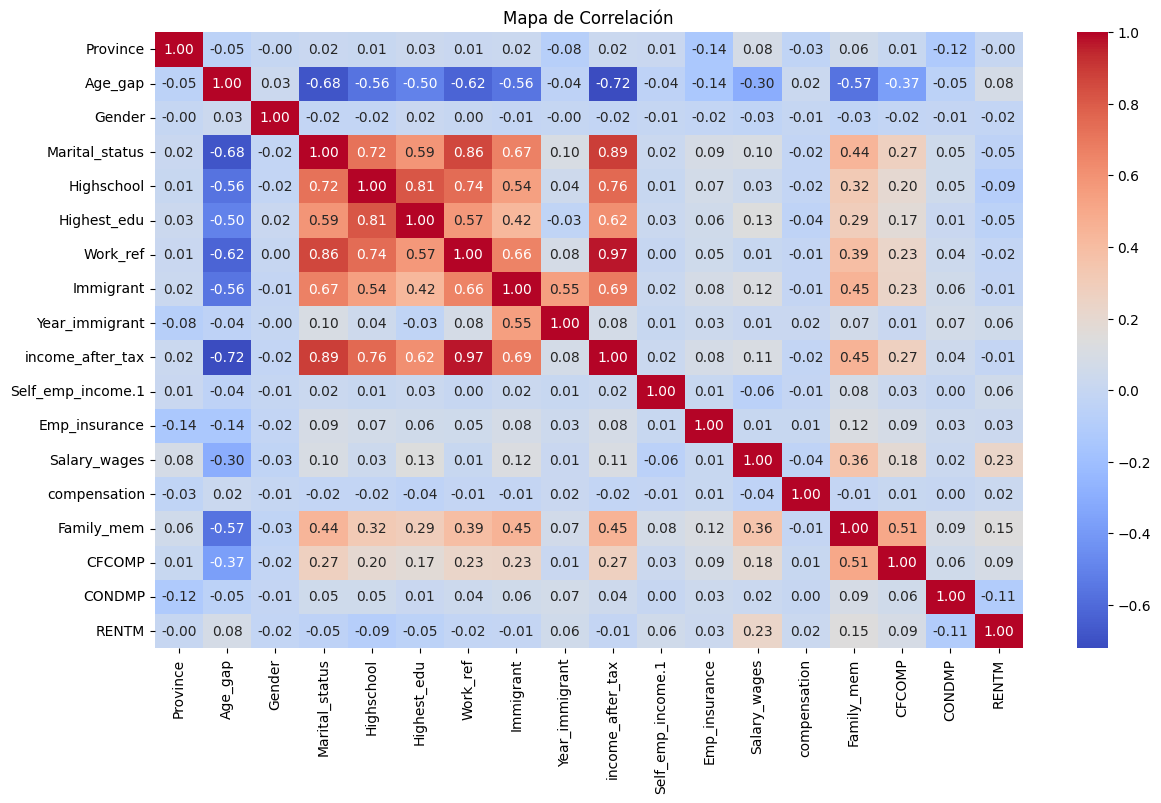

In [163]:
# Generamos nuevamente un mapa de calor para visualizar las variables que nos quedan hasta el momento
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

In [164]:
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature        VIF
6            Work_ref  62.676635
8      Year_immigrant  32.999377
1             Age_gap  15.226026
5         Highest_edu  13.782573
7           Immigrant  11.222872
14         Family_mem   9.909977
2              Gender   9.577638
4          Highschool   9.545198
15             CFCOMP   8.088249
3      Marital_status   6.903521
0            Province   6.223573
12       Salary_wages   2.755622
11      Emp_insurance   1.183016
10  Self_emp_income.1   1.073842
13       compensation   1.023802
16             CONDMP  -0.055342
17              RENTM  -0.056019
9    income_after_tax  -0.295579


In [165]:
columns_to_drop = ["Province", "Year_immigrant"]

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,15,2,3,1,3,2,2,20275,0,0,0,0,1,1,99999996,99999996
1,9,1,1,1,2,1,2,61680,0,0,106000,0,4,4,99999996,99999996
2,9,2,1,1,3,1,2,26875,0,0,106000,0,4,4,99999996,99999996
3,4,1,4,2,1,1,2,14000,0,0,106000,0,4,4,99999996,99999996
4,3,1,96,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


In [166]:
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature        VIF
5            Work_ref  61.291675
0             Age_gap  14.335296
4         Highest_edu  13.631080
12         Family_mem   9.789608
3          Highschool   9.531514
1              Gender   9.289062
13             CFCOMP   7.986292
2      Marital_status   6.902764
6           Immigrant   5.970163
10       Salary_wages   2.707932
9       Emp_insurance   1.163471
8   Self_emp_income.1   1.072383
11       compensation   1.023124
14             CONDMP  -0.047780
15              RENTM  -0.054834
7    income_after_tax  -0.283781


## Paso 6. Análisis detallado de cada variable actual.

In [167]:

print(data.columns)


Index(['Age_gap', 'Gender', 'Marital_status', 'Highschool', 'Highest_edu',
       'Work_ref', 'Immigrant', 'income_after_tax', 'Self_emp_income.1',
       'Emp_insurance', 'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP',
       'CONDMP', 'RENTM'],
      dtype='object')


In [168]:
# Variable "Work_ref"
desc = data["Work_ref"].describe()
val_c = data["Work_ref"].value_counts()

print(f"Dato de la variable: \n {desc} \n")
print(f"Valores: \n {val_c}")

Dato de la variable: 
 count    72643.000000
mean         2.167284
std          1.826628
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Work_ref, dtype: float64 

Valores: 
 Work_ref
1    39160
2    20655
6    12828
Name: count, dtype: int64


/tmp/ipykernel_841/885695113.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Work_ref', data=data, palette='pastel', ax=axes[0, 0])
/tmp/ipykernel_841/885695113.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Empleado', 'Desempleado', 'Retirado'])
/tmp/ipykernel_841/885695113.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Work_ref'], palette='pastel', ax=axes[0, 1])
/tmp/ipykernel_841/885695113.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

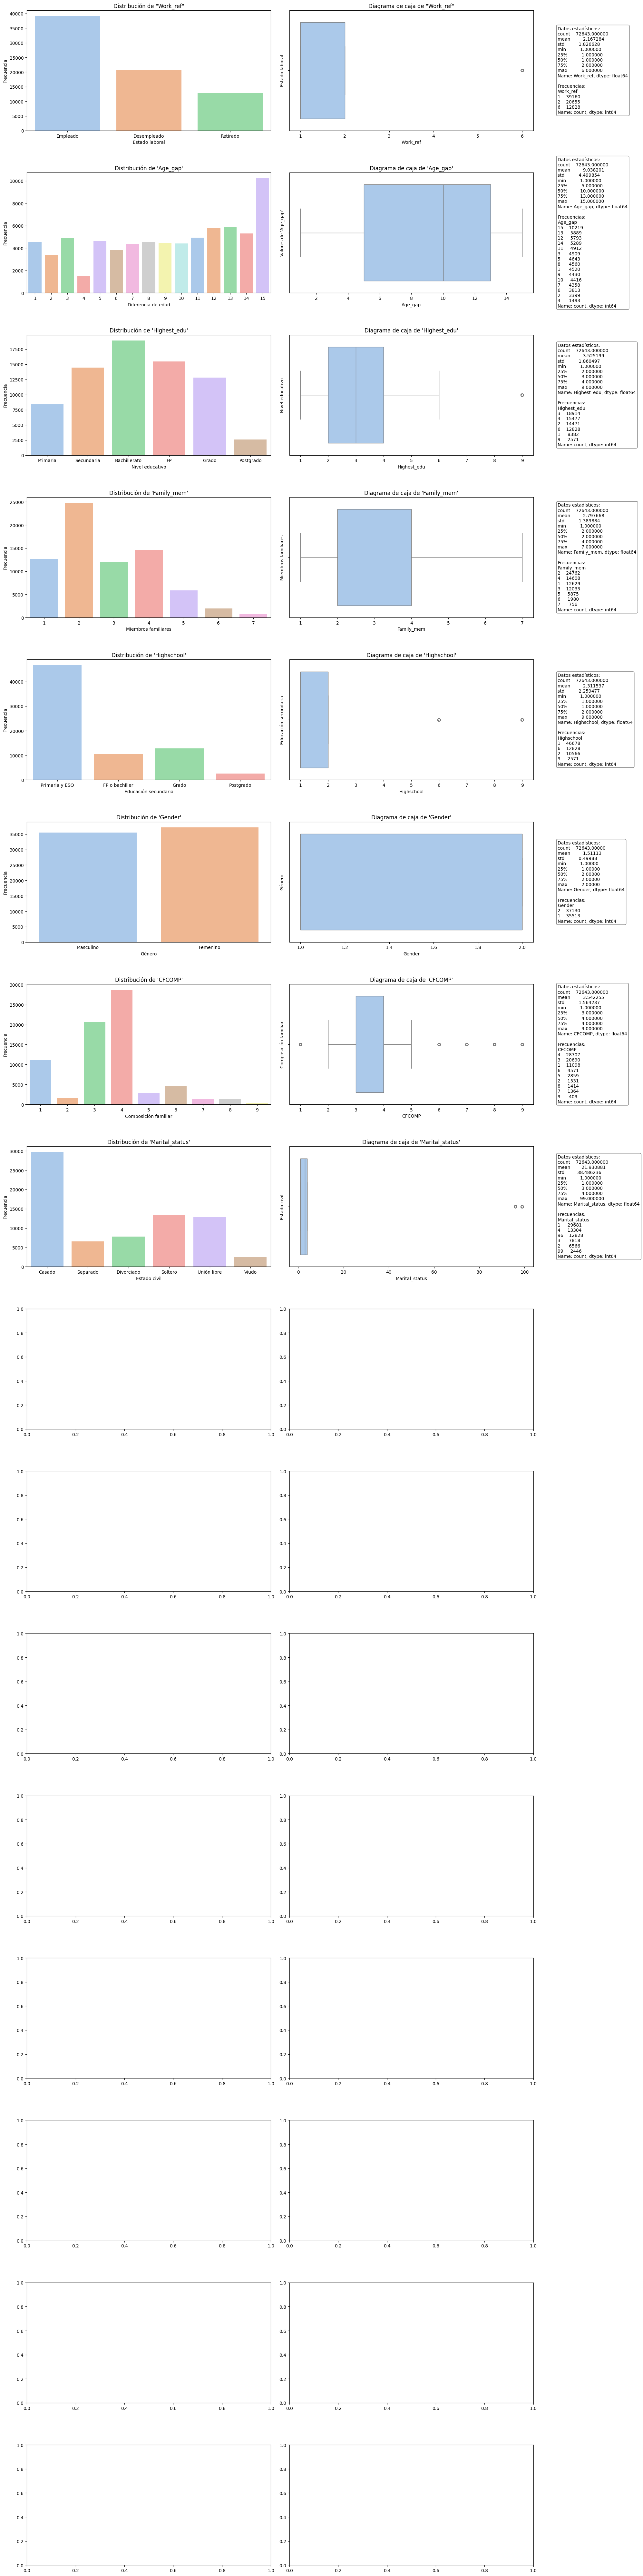

In [169]:
# Creamos una figura con 16 filas y 2 columnas
fig, axes = plt.subplots(16, 2, figsize=(20, 80))  # Ajustar el tamaño para acomodar 16x2 gráficos


# "work_ref"
# Cálculo de estadísticas para "Work_ref"
desc_work_ref = data["Work_ref"].describe()
val_c_work_ref = data["Work_ref"].value_counts()
stats_text = f"Datos estadísticos:\n{desc_work_ref}\n\nFrecuencias:\n{val_c_work_ref}"  # Definir stats_text_work_ref
# Distribución de Work_ref
sns.countplot(x='Work_ref', data=data, palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de "Work_ref"')
axes[0, 0].set_xlabel('Estado laboral')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_xticklabels(['Empleado', 'Desempleado', 'Retirado'])
# Diagrama de caja
sns.boxplot(x=data['Work_ref'], palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Diagrama de caja de "Work_ref"')
axes[0, 1].set_ylabel('Estado laboral')
# Incluir información en el diagrama de caja
axes[0, 1].text(
    1.1, 0.5, stats_text, transform=axes[0, 1].transAxes,
    fontsize=10, verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
)



# Cálculo de estadísticas para "Age_gap"
desc_age_gap = data["Age_gap"].describe()
val_c_age_gap = data["Age_gap"].value_counts()
stats_text_age_gap = f"Datos estadísticos:\n{desc_age_gap}\n\nFrecuencias:\n{val_c_age_gap}"  # Definir stats_text_age_gap
# Distribución de Age_gap
sns.countplot(x='Age_gap', data=data, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title("Distribución de 'Age_gap'")
axes[1, 0].set_xlabel("Diferencia de edad")
axes[1, 0].set_ylabel("Frecuencia")
# Diagrama de caja para Age_gap
sns.boxplot(x=data['Age_gap'], palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title("Diagrama de caja de 'Age_gap'")
axes[1, 1].set_ylabel("Valores de 'Age_gap'")
axes[1, 1].text(1.1, 0.5, stats_text_age_gap, transform=axes[1, 1].transAxes, fontsize=10, 
                verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))



# Cálculo de estadísticas para "Highest_edu"
desc_highest_edu = data["Highest_edu"].describe()
val_c_highest_edu = data["Highest_edu"].value_counts()
stats_text_highest_edu = f"Datos estadísticos:\n{desc_highest_edu}\n\nFrecuencias:\n{val_c_highest_edu}"  # Definir stats_text_highest_edu
# Distribución de Highest_edu
sns.countplot(x='Highest_edu', data=data, palette='pastel', ax=axes[2, 0])
axes[2, 0].set_title("Distribución de 'Highest_edu'")
axes[2, 0].set_xlabel("Nivel educativo")
axes[2, 0].set_ylabel("Frecuencia")
axes[2, 0].set_xticklabels(['Primaria', 'Secundaria', 'Bachillerato', 'FP', 'Grado', 'Postgrado'])
# Diagrama de caja para Highest_edu
sns.boxplot(x=data['Highest_edu'], palette='pastel', ax=axes[2, 1])
axes[2, 1].set_title("Diagrama de caja de 'Highest_edu'")
axes[2, 1].set_ylabel("Nivel educativo")
axes[2, 1].text(1.1, 0.5, stats_text_highest_edu, transform=axes[2, 1].transAxes, fontsize=10, 
                verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))


# Cálculo de estadísticas para "Family_mem"
desc_family_mem = data["Family_mem"].describe()
val_c_family_mem = data["Family_mem"].value_counts()
stats_text_Family_mem = f"Datos estadísticos:\n{desc_family_mem}\n\nFrecuencias:\n{val_c_family_mem}"  # Definir stats_text_Family_mem
# Distribución de Family_mem
sns.countplot(x='Family_mem', data=data, palette='pastel', ax=axes[3, 0])
axes[3, 0].set_title("Distribución de 'Family_mem'")
axes[3, 0].set_xlabel("Miembros familiares")
axes[3, 0].set_ylabel("Frecuencia")
stats_text_family_mem = f"Datos estadísticos:\n{desc_family_mem}\n\nFrecuencias:\n{val_c_family_mem}"
# Diagrama de caja para Family_mem
sns.boxplot(x=data['Family_mem'], palette='pastel', ax=axes[3, 1])
axes[3, 1].set_title("Diagrama de caja de 'Family_mem'")
axes[3, 1].set_ylabel("Miembros familiares")
axes[3, 1].text(1.1, 0.5, stats_text_family_mem, transform=axes[3, 1].transAxes, fontsize=10, 
                verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))


# Cálculo de estadísticas para "Highschool"
desc_highschool = data["Highschool"].describe()
val_c_highschool = data["Highschool"].value_counts()
stats_text_highschool = f"Datos estadísticos:\n{desc_highschool}\n\nFrecuencias:\n{val_c_highschool}"  # Definir stats_text_Highschool
# Distribución de Highschool
sns.countplot(x='Highschool', data=data, palette='pastel', ax=axes[4, 0])
axes[4, 0].set_title("Distribución de 'Highschool'")
axes[4, 0].set_xlabel("Educación secundaria")
axes[4, 0].set_ylabel("Frecuencia")
axes[4, 0].set_xticklabels(['Primaria y ESO', 'FP o bachiller', 'Grado', 'Postgrado'])
stats_text_highschool = f"Datos estadísticos:\n{desc_highschool}\n\nFrecuencias:\n{val_c_highschool}"
# Diagrama de caja para Highschool
sns.boxplot(x=data['Highschool'], palette='pastel', ax=axes[4, 1])
axes[4, 1].set_title("Diagrama de caja de 'Highschool'")
axes[4, 1].set_ylabel("Educación secundaria")
axes[4, 1].text(1.1, 0.5, stats_text_highschool, transform=axes[4, 1].transAxes, fontsize=10, 
                verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))


# Cálculo de estadísticas para "Gender"
desc_gender = data["Gender"].describe()
val_c_gender = data["Gender"].value_counts()
stats_text_gender = f"Datos estadísticos:\n{desc_gender}\n\nFrecuencias:\n{val_c_gender}"  # Definir stats_text_gender
# Distribución de Gender
sns.countplot(x='Gender', data=data, palette='pastel', ax=axes[5, 0])
axes[5, 0].set_title("Distribución de 'Gender'")
axes[5, 0].set_xlabel("Género")
axes[5, 0].set_ylabel("Frecuencia")
axes[5, 0].set_xticklabels(['Masculino', 'Femenino'])
stats_text_gender = f"Datos estadísticos:\n{desc_gender}\n\nFrecuencias:\n{val_c_gender}"
# Diagrama de caja para Gender
sns.boxplot(x=data['Gender'], palette='pastel', ax=axes[5, 1])
axes[5, 1].set_title("Diagrama de caja de 'Gender'")
axes[5, 1].set_ylabel("Género")
axes[5, 1].text(1.1, 0.5, stats_text_gender, transform=axes[5, 1].transAxes, fontsize=10, 
                verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))


# Cálculo de estadísticas para "CFCOMP"
desc_cfcomp = data["CFCOMP"].describe()
val_c_cfcomp = data["CFCOMP"].value_counts()
stats_text_cfcomp = f"Datos estadísticos:\n{desc_cfcomp}\n\nFrecuencias:\n{val_c_cfcomp}"  # Definir stats_text_CFCOMP
# Distribución de CFCOMP
sns.countplot(x='CFCOMP', data=data, palette='pastel', ax=axes[6, 0])
axes[6, 0].set_title("Distribución de 'CFCOMP'")
axes[6, 0].set_xlabel("Composición familiar")
axes[6, 0].set_ylabel("Frecuencia")
# Diagrama de caja para CFCOMP
sns.boxplot(x=data['CFCOMP'], palette='pastel', ax=axes[6, 1])
axes[6, 1].set_title("Diagrama de caja de 'CFCOMP'")
axes[6, 1].set_ylabel("Composición familiar")
axes[6, 1].text(
    1.1, 0.5, stats_text_cfcomp, transform=axes[6, 1].transAxes,
    fontsize=10, verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
)


# Cálculo de estadísticas para "Marital_status"
desc_marital_status = data["Marital_status"].describe()
val_c_marital_status = data["Marital_status"].value_counts()
stats_text_marital_status = f"Datos estadísticos:\n{desc_marital_status}\n\nFrecuencias:\n{val_c_marital_status}"  # Definir stats_text_marital_status
# Distribución de Marital_status
sns.countplot(x='Marital_status', data=data, palette='pastel', ax=axes[7, 0])
axes[7, 0].set_title("Distribución de 'Marital_status'")
axes[7, 0].set_xlabel("Estado civil")
axes[7, 0].set_ylabel("Frecuencia")
axes[7, 0].set_xticklabels(['Casado', 'Separado','Divorciado','Soltero','Unión libre', 'Viudo'])
# Diagrama de caja para Marital_status
sns.boxplot(x=data['Marital_status'], palette='pastel', ax=axes[7, 1])
axes[7, 1].set_title("Diagrama de caja de 'Marital_status'")
axes[7, 1].set_ylabel("Estado civil")
axes[7, 1].text(
    1.1, 0.5, stats_text_marital_status, transform=axes[7, 1].transAxes,
    fontsize=10, verticalalignment='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray")
)


# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [170]:
variable = "CFCOMP"

# Función para eliminar outliers
def remove_outliers_specific(data, column):
    df_clean = data.copy()
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar valores dentro de los límites
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

# Aplicar la función a la variable específica
df_sin_outliers = remove_outliers_specific(data, variable)




'''


variable = "Marital_status"

# Función para eliminar outliers
def remove_outliers_specific(data, column):
    df_clean = data.copy()
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar valores dentro de los límites
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

# Aplicar la función a la variable específica
df_sin_outliers = remove_outliers_specific(data, variable)

df_sin_outliers






variable = "Highschool"

# Función para eliminar outliers
def remove_outliers_specific(data, column):
    df_clean = data.copy()
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar valores dentro de los límites
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

# Aplicar la función a la variable específica
df_sin_outliers = remove_outliers_specific(data, variable)





variable = "Work_ref"

# Función para eliminar outliers
def remove_outliers_specific(data, column):
    df_clean = data.copy()
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar valores dentro de los límites
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

# Aplicar la función a la variable específica
df_sin_outliers = remove_outliers_specific(data, variable)
'''

df_sin_outliers

,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
1,9,1,1,1,2,1,2,61680,0,0,106000,0,4,4,99999996,99999996
2,9,2,1,1,3,1,2,26875,0,0,106000,0,4,4,99999996,99999996
3,4,1,4,2,1,1,2,14000,0,0,106000,0,4,4,99999996,99999996
4,3,1,96,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996
9,9,1,1,1,4,1,1,31270,0,21500,43500,0,4,4,99999996,99999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72637,10,2,1,1,4,1,1,51960,23000,0,28400,0,3,4,99999996,1800
72638,5,1,4,1,2,1,1,4625,23000,0,28400,0,3,4,99999996,1800
72639,12,2,1,1,3,1,2,27940,0,0,27350,0,3,4,99999996,99999996
72640,13,1,1,1,3,2,2,63830,0,0,27350,0,3,4,99999996,99999996


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Separar variables predictoras y target
X = df_sin_outliers.drop(columns=["income_after_tax"])
y = df_sin_outliers["income_after_tax"]

# Normalizar la variable objetivo
y = (y - y.min()) / (y.max() - y.min())  # Min-Max Scaling

# Seleccionar las mejores características
k = 5  # Número de características a seleccionar
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Convertir de nuevo a DataFrame con las mejores características
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("Características seleccionadas:", list(selected_features))
print("R²:", r2_score(y_test, y_pred))
print("Error Absoluto Medio:", mean_absolute_error(y_test, y_pred))


Características seleccionadas: ['Age_gap', 'Marital_status', 'Highschool', 'Work_ref', 'Immigrant']
R²: 0.9731270919059306
Error Absoluto Medio: 0.05091667446462352


In [178]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Separar variables predictoras y target
X = df_sin_outliers.drop(columns=["income_after_tax"])
y = df_sin_outliers["income_after_tax"]

# Normalizar la variable objetivo
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Seleccionar las mejores características
k = 5  # Número de características a seleccionar
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Convertir de nuevo a DataFrame con las mejores características
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Modelo de Árbol de Decisión con ajuste de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_dt_model = grid_search.best_estimator_

# Predicción
y_pred = best_dt_model.predict(X_test)

# Desnormalizar predicciones
y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluación
print("Características seleccionadas:", list(selected_features))
print("Mejores hiperparámetros:", grid_search.best_params_)
print("R²:", r2_score(y_test_original, y_pred_original))
print("Error Absoluto Medio:", mean_absolute_error(y_test_original, y_pred_original))

Características seleccionadas: ['Age_gap', 'Marital_status', 'Highschool', 'Work_ref', 'Immigrant']
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
R²: 0.999999473448786
Error Absoluto Medio: 16566.080259069382


# **VARIABLE TARGET EN PROFUNDIDAD**

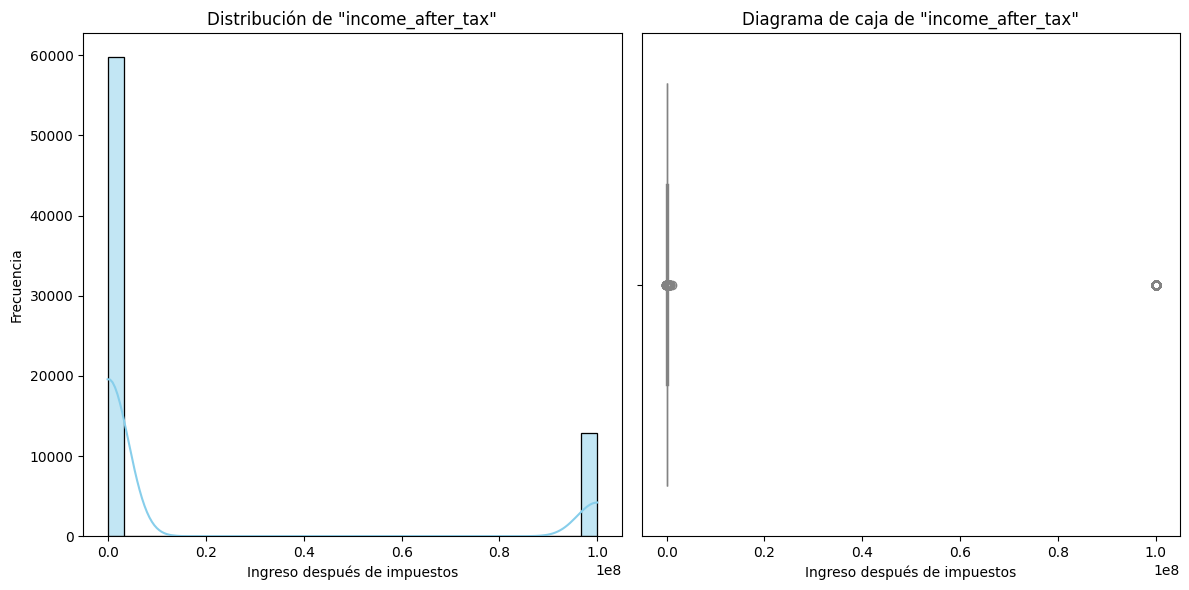

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas y tamaño ajustado

# Primer gráfico: Distribución de income_after_tax
sns.histplot(data['income_after_tax'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de "income_after_tax"')
axes[0].set_xlabel('Ingreso después de impuestos')
axes[0].set_ylabel('Frecuencia')

# Segundo gráfico: Diagrama de caja de income_after_tax
sns.boxplot(x=data['income_after_tax'], color='lightpink', ax=axes[1])
axes[1].set_title('Diagrama de caja de "income_after_tax"')
axes[1].set_xlabel('Ingreso después de impuestos')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

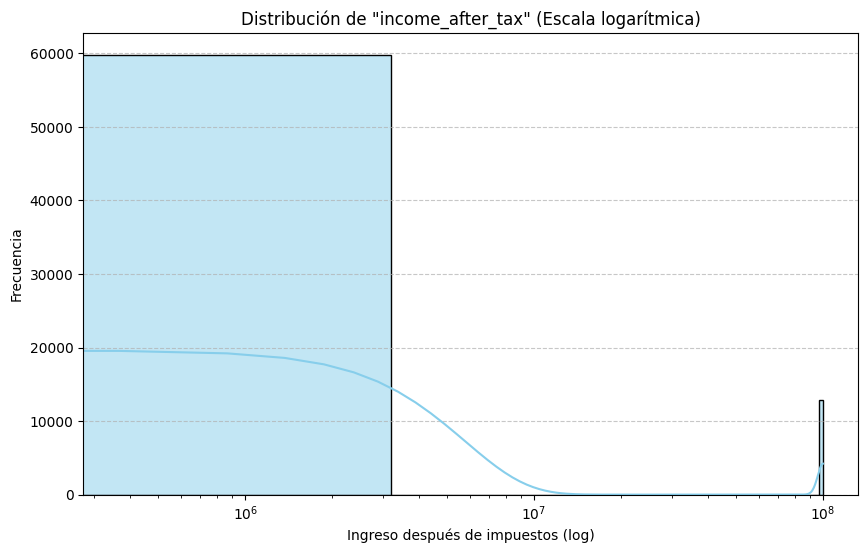

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(data['income_after_tax'], bins=30, kde=True, color='skyblue')
plt.xscale('log')
plt.title('Distribución de "income_after_tax" (Escala logarítmica)')
plt.xlabel('Ingreso después de impuestos (log)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [174]:
# Contar el número de outliers (valores mayores o iguales a 15 millón)
num_outliers = data[data['income_after_tax'] >= 99000000].shape[0]

print(f"Número de outliers: {num_outliers}")

Número de outliers: 12828


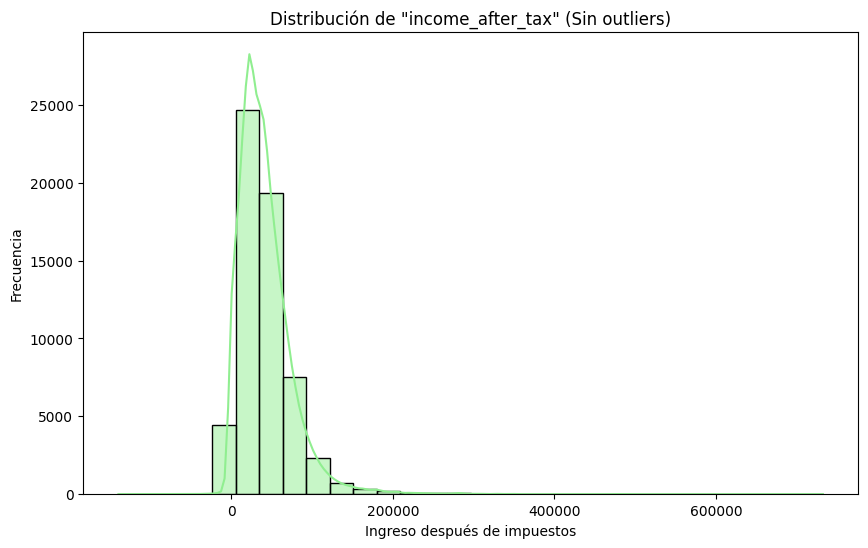

In [175]:
filtered_data = data[data['income_after_tax'] < 1000000]  # Filtrar ingresos menores a 1 millón

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['income_after_tax'], bins=30, kde=True, color='lightgreen')
plt.title('Distribución de "income_after_tax" (Sin outliers)')
plt.xlabel('Ingreso después de impuestos')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipykernel_841/3233566865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income_group', data=data, palette='pastel')


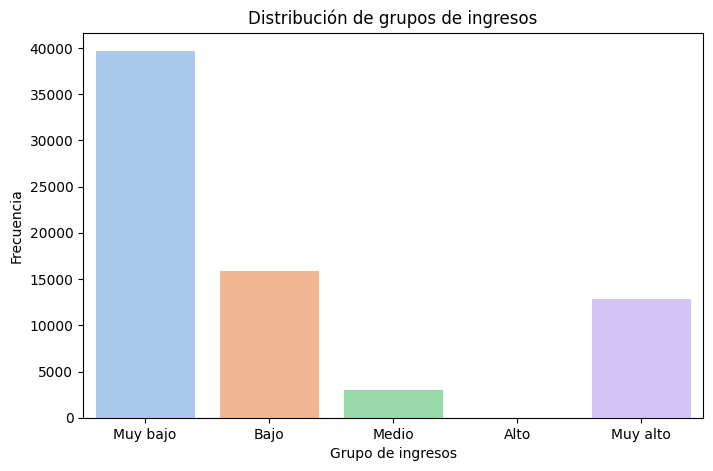

In [176]:
bins = [0, 50000, 100000, 500000, 1000000, data['income_after_tax'].max()]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
data['income_group'] = pd.cut(data['income_after_tax'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.countplot(x='income_group', data=data, palette='pastel')
plt.title('Distribución de grupos de ingresos')
plt.xlabel('Grupo de ingresos')
plt.ylabel('Frecuencia')
plt.show()

A TENER EN CUENTA:
- CAD: Dolar Canadiense
- Ingresos medio/anual: 60.000 - 70.000
- Ingresos altos: 100.000 - 200.000
- El 1% se encuentra con ingresos muy altos: por encima de 250.000 CAD anual